<a href="https://colab.research.google.com/github/Nishidh25/Deeplearning-Models/blob/master/LAB1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear regression

## Preprocessing

In [1]:
import pandas as pd
df = pd.read_csv('sat_cgpa.csv')

In [2]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [4]:
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [5]:
df.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [8]:
X = df.drop(columns='GPA') # SAT
y = df.drop(columns='SAT') # GPA

Text(0, 0.5, 'GPA Score --->')

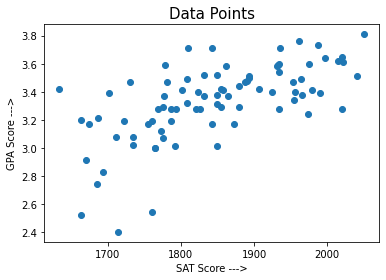

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.title('Data Points', fontsize = 15)
plt.xlabel('SAT Score --->')
plt.ylabel('GPA Score --->')

**Conclusion 1** For the given data GPA and SAT scores have fairly positive assocoiation

## Linear regression

In [10]:
import statsmodels.api as sm
x = sm.add_constant(X)
print(x)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    const   SAT
0     1.0  1714
1     1.0  1664
2     1.0  1760
3     1.0  1685
4     1.0  1693
..    ...   ...
79    1.0  1936
80    1.0  1810
81    1.0  1987
82    1.0  1962
83    1.0  2050

[84 rows x 2 columns]


In [11]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           7.20e-11
Time:                        12:12:58   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Conclusion 4**: 
p value has significant value,  for slope p value is very low

Therefore null hypothesis can be rejected

Text(0, 0.5, 'GPA Score --->')

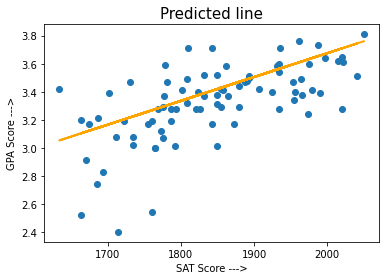

In [12]:
plt.scatter(X, y)
y_pred = 0.275+0.0017*X
plt.plot(X, y_pred, color='orange', linewidth=2)
plt.title('Predicted line', fontsize = 15)
plt.xlabel('SAT Score --->')
plt.ylabel('GPA Score --->')

**Conclusion 2**: For the given data
y intercept =  0.275 and slope = 0.0017

(0.0, 3.8805)

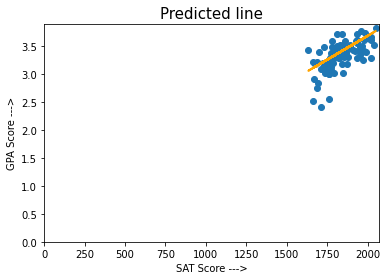

In [19]:
plt.scatter(X, y)
y_pred = 0.275+0.0017*X
plt.plot(X, y_pred, color='orange', linewidth=2)
plt.title('Predicted line', fontsize = 15)
plt.xlabel('SAT Score --->')
plt.ylabel('GPA Score --->')
plt.xlim(0)
plt.ylim(0)

**Conclusion 3**: 
For extended regression line it can be concluded that y intercept is low ~ 0.
Therefore it can be concluded that y intercept is 0 for the whole population

In [25]:
 a_neg = 3.330238 - 0.673 * 0.271617 / 84**0.5
 a_pos = 3.330238 + 0.673 * 0.271617 / 84**0.5
 a_neg,a_pos

(3.3102930767550647, 3.3501829232449354)

In [30]:
y_pred = 0.275+0.0017*1400
y_pred

2.655